# Basic DataFrame Operations with Pandas
#### http://vijayshinva.github.io
**NOTE:** *This tutorial uses the Titanic dataset from https://www.kaggle.com/c/titanic/data*

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('datasets/titanic/train.csv')

### Basic
- *head(n)* returns first n(default 5) rows
- *info()* returns a summary of the dataframe
 - PassengerId has 891 entries while Age has 714. This indicates some age information is missing

In [97]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Data Selection

**Column Selection**

- Columns can be selected by passing the column name

```
dataset['Name']
```

You can also use the dot syntax

```
dataset.Name 
```

But this won't work if there are spaces in the column name

- Multiple columns can be selected by passing a list of column names

```
dataset[['Name', 'Sex']] 
```

In [ ]:
dataset.Name

In [ ]:
dataset[['Name', 'Sex']]

**Row Selection**

- A single row can be selected by its index (location) (zero based index)
```
dataset.loc[4]
```
- Specific rows can be selected by passing a list of index values
```
dataset.loc[[4,16]]
```
- You can also pass a slice object
```
dataset.loc[[4:6]]       #dataset[4:6]
```

In [37]:
dataset.loc[4]

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

In [46]:
dataset.loc[[4,16]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q


** Column and Row Selection **

To pick a specific value first start with column and then row

```
dataset['Name'][5]
```
You can also do 
```
dataset.loc[5]['Name']
```

In [24]:
dataset['Name'][5]

'Moran, Mr. James'

In [52]:
dataset.loc[5]['Name']

'Moran, Mr. James'

### Filtering

- Logical operations return a boolean vector
```
dataset['Sex'] == 'male'
```
- This boolean vector can then be used to filter the dataframe
```
dataset[dataset['Sex'] == 'male']
```
- You can filter by multiple columns as follows
```
dataset[(dataset['Sex'] == 'male') & (dataset['Pclass'] == 1)]   # & | ~
```


In [ ]:
dataset['Sex'] == 'male'

In [55]:
dataset[dataset['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [60]:
dataset[(dataset['Sex'] == 'male') & (dataset['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C


**Working with String and Date Processors**
- List passenger details whoes names contain Timothy
```
dataset[dataset['Name'].contains('Timothy')]
```
- will not work. Try
```
dataset[dataset['Name'].str.contains('Timothy')]
```

- .str, .dt, .tz, .cat

In [122]:
dataset[dataset['Name'].str.contains('Timothy')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q


**Lambda Filters**
- You can also pass a callable as the indexer
```
dataset.loc[lambda df: df.Age > 50]
```

In [67]:
dataset.loc[lambda df: df.Age > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S


### Masking

- Filtering returns a subset of the dataframe. If you want to maintain the shape of the data you can use the **where()** method
```
dataset.where(dataset.Age > 50)
```
- Only the filtered rows are available and the rest are filled with NaN

In [71]:
dataset.where(dataset.Age > 50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### GroupBy

- **groupby** is similar to the TSQL **GROUP BY** and is used in conjunction with Aggregation functions
```
dataset.groupby('Sex')
```
```
dataset.groupby('Sex').mean()
```
![group by mean](images/basic-data-operations-with-pandas-1.png)
The above result tells us 
 - The average female age was 27.9 and the average male age was 30.7
 - More females survived as the Survived column has 1,0
 - Average of PassengerId, Pclass etc make no sense
- You can filter out the required columns as follows
```
dataset.groupby('Sex')['Survived','Age'].mean()
```
- You can group by multiple columns by passing a list of column names
```
dataset.groupby(['Pclass','Sex'])['Survived','Age'].mean()
```

In [75]:
dataset.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [77]:
dataset.groupby('Sex')['Survived','Age'].mean()

,Survived,Age
Sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [79]:
dataset.groupby(['Pclass','Sex'])['Survived','Age'].mean()

Survived        Age
Pclass Sex                        
1      female  0.968085  34.611765
       male    0.368852  41.281386
2      female  0.921053  28.722973
       male    0.157407  30.740707
3      female  0.500000  21.750000
       male    0.135447  26.507589

### Random Samples
- Random samples can be drawn from the dataframe using the **sample** method
```
dataset.sample(n=5)
```
```
dataset.sample(frac=0.1)
```


In [82]:
dataset.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C


In [83]:
dataset.sample(frac=0.1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.00,4,1,3101295,39.6875,NaN,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.6333,C32,C
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.00,0,0,4138,9.8417,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.00,1,0,SC/PARIS 2149,13.8583,NaN,C
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.00,1,1,12749,93.5000,B69,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.00,1,1,345773,24.1500,NaN,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.00,1,0,28134,11.5000,NaN,S


** Splitting the dataframe into training and testing dataset **

- The code below creates two dataframes train with 80% of the rows and test with 20% of the rows
```
train_data = dataset.sample(frac=0.8, random_state=200)
test_data = dataset.drop(train_data.index)
```
- The random_state is a seed to the pandas random number generator. With a given seed, pandas will always draw the same rows.


In [84]:
train_data = dataset.sample(frac=0.8, random_state=200)
test_data = dataset.drop(train_data.index)

### One Hot Encode
- The Survided column is a categorial variable
- One Hot Encoding changes the way cateforial variables are represented (1 of K)

In [91]:
hotencoded_dataset = pd.get_dummies(dataset, columns=['Survived'])
hotencoded_dataset.rename(index=str, columns={"Survived_0":"Survived_No", "Survived_1":"Survived_Yes"})

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_No,Survived_Yes
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1


### Index
- The current dataframe has an autogenerated integer index (starting with 0)
- dataset.loc[0] returns the row with PassenderId 1
- You can use the PassengerId as the Index
```
dataset.set_index('PassengerId')
```

In [94]:
dataset.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Plots

- Pandas has inbuilt charting capability with matplotlib
```
dataset.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.show()
```

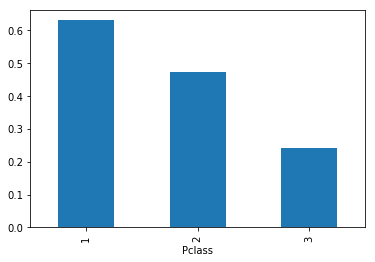

In [114]:
dataset.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.show()

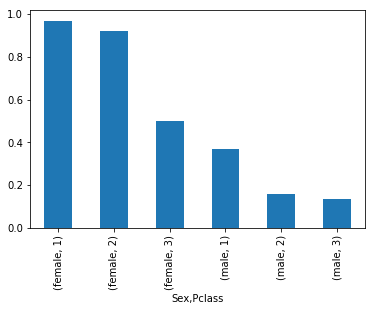

In [116]:
dataset.groupby(['Sex','Pclass'])['Survived'].mean().plot(kind='bar')
plt.show()

- This visually shows us that a First Class Female passenger had the highest chances of survival
- A Third Class Male passenger had the lowest chance of survival